<a href="https://colab.research.google.com/github/sunshineluyao/vis-basics/blob/main/chapter8/Typoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source: https://ncics.org/


In [ ]:
!pip install basemap basemap-data-hires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import requests
from io import StringIO
import os

# Define the IBTrACS data URL for global tropical cyclone data
ibtracs_url = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv"

# Check if the dataset is already downloaded
if not os.path.exists("ibtracs_all.csv"):
    print("Downloading IBTrACS dataset...")
    response = requests.get(ibtracs_url)
    if response.status_code == 200:
        with open("ibtracs_all.csv", "wb") as file:
            file.write(response.content)
        print("Dataset downloaded successfully!")
    else:
        print("Failed to download dataset. Please check the URL.")
        exit()

# Load the dataset
data = pd.read_csv("ibtracs_all.csv", low_memory=False)

data.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,kts,mb,,,km,km,,,,degrees_north,degrees_east,,,kts,mb,1,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,mb,nmile,nmile,nmile,degrees_north,degrees_east,1,kts,mb,,nmile,nmile,,nmile,nmile,1,degrees_north,degrees_east,1,kts,mb,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,,kts,mb,1,mb,mb,degrees_north,degrees_east,,kts,mb,1,1,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,degrees_north,degrees_east,,kts,mb,1,1,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,mb,nmile,,,degrees_north,degrees_east,1,kts,mb,degrees_north,degrees_east,kts,mb,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,kts,mb,nmile,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,,kts,mb,kts,kts,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,,,,main,43,0,__________O___,,,,,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10.9000,80.3000,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,9,266
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___,,,,,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10.8709,79.8265,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___,,,,,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10.8431,79.3524,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___,,,,,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,10.8188,78.8772,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,9,267


In [ ]:
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
data.tail()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
716161,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 06:00:00,NR,23.0325,89.3509,,,,PROVISIONAL,0,0,O_____________,tcvitals,BB012024,23.0325,89.3509,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,40
716162,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 09:00:00,NR,23.3337,89.6178,,,,PROVISIONAL,0,0,P_____________,,BB012024,23.3337,89.6178,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,39
716163,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 12:00:00,NR,23.6263,89.8799,,,,PROVISIONAL,0,0,O_____________,tcvitals,BB012024,23.6263,89.8799,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,39
716164,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 15:00:00,NR,23.9143,90.1400,,,,PROVISIONAL,0,0,P_____________,,BB012024,23.9143,90.1400,,,,,-5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,40
716165,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 18:00:00,NR,24.2000,90.4000,,,,PROVISIONAL,0,,O_____________,tcvitals,BB012024,24.2000,90.4000,,,39,984,0,110,170,140,90,,,,,,,,,996,130,65,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,40


In [ ]:
# Step 2: Ensure LAT, LON, and SEASON are numeric
data['LAT'] = pd.to_numeric(data['LAT'], errors='coerce')
data['LON'] = pd.to_numeric(data['LON'], errors='coerce')
data['SEASON'] = pd.to_numeric(data['SEASON'], errors='coerce')

# Step 3: Filter dataset for the year 2024
typhoons_2024 = data[data['SEASON'] == 2024]

# Step 4: List unique typhoon names in 2024
unique_typhoons = typhoons_2024['NAME'].unique()
print("List of Typhoons in 2024:")
for idx, name in enumerate(unique_typhoons, start=1):
    print(f"{idx}. {name}")

List of Typhoons in 2024:
1. LOLA
2. MAL
3. JASPER
4. ALVARO
5. BELAL
6. ANGGREK
7. KIRRILY
8. CANDICE
9. NOT_NAMED
10. NAT
11. OSAI
12. DJOUNGOU
13. LINCOLN
14. ELEANOR
15. FILIPO
16. NEVILLE
17. MEGAN
18. GAMANE
19. OLGA
20. PAUL
21. HIDAYA
22. IALY
23. EWINIAR
24. REMAL


In [ ]:
!pip install cartopy


In [ ]:
import cartopy.crs as ccrs


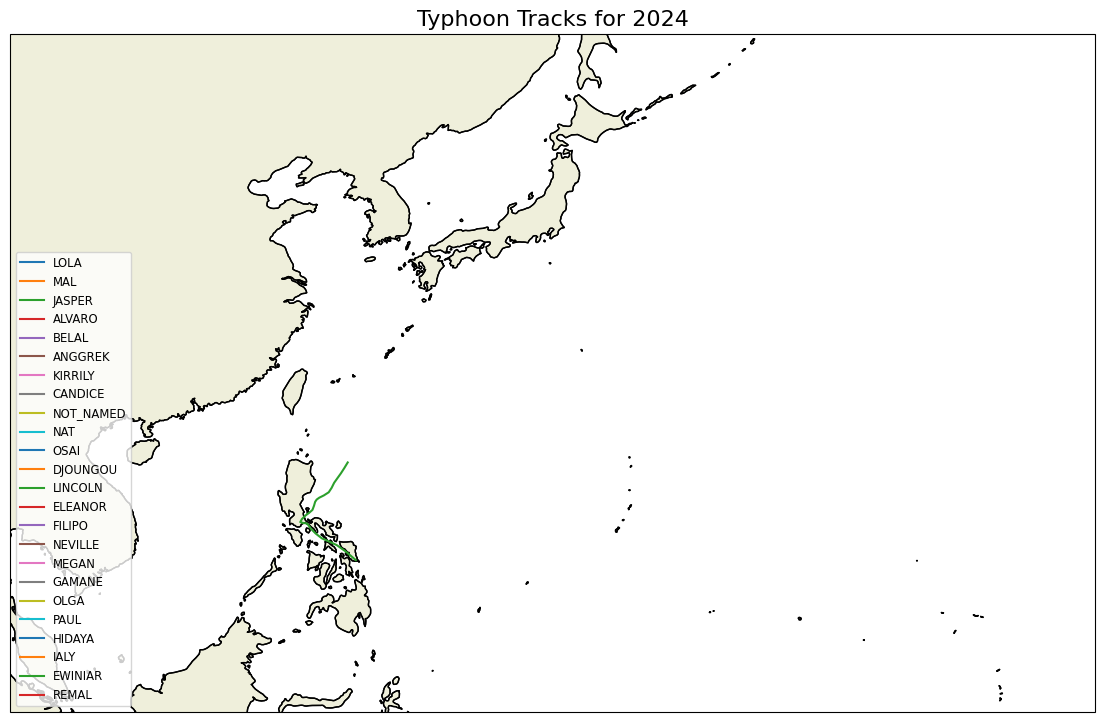

In [ ]:
# Step 5: Prepare for visualization
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # Import ccrs for projection
import cartopy.feature as cfeature

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([100, 180, 0, 50], crs=ccrs.PlateCarree())  # Focus on the Western Pacific region
ax.set_title('Typhoon Tracks for 2024', fontsize=16)

# Step 6: Plot each typhoon track
for typhoon_name in unique_typhoons:
    typhoon_data = typhoons_2024[typhoons_2024['NAME'] == typhoon_name]
    plt.plot(typhoon_data['LON'], typhoon_data['LAT'], label=typhoon_name, transform=ccrs.PlateCarree())

# Add legend
plt.legend(loc='lower left', fontsize='small')
plt.show()

In [ ]:
!pip install plotly pandas


In [ ]:
import pandas as pd
import plotly.express as px


# Step 3: Filter dataset for the year 2024
typhoons_2024 = data[data['SEASON'] == 2024]

# Step 4: Interactive visualization using Plotly
fig = px.scatter_geo(
    typhoons_2024,
    lat='LAT',
    lon='LON',
    color='NAME',
    hover_name='NAME',
    hover_data={'LAT': True, 'LON': True, 'USA_WIND': True},
    title='Interactive Typhoon Tracks for 2024',
    projection='natural earth'
)

# Show the figure
fig.show()


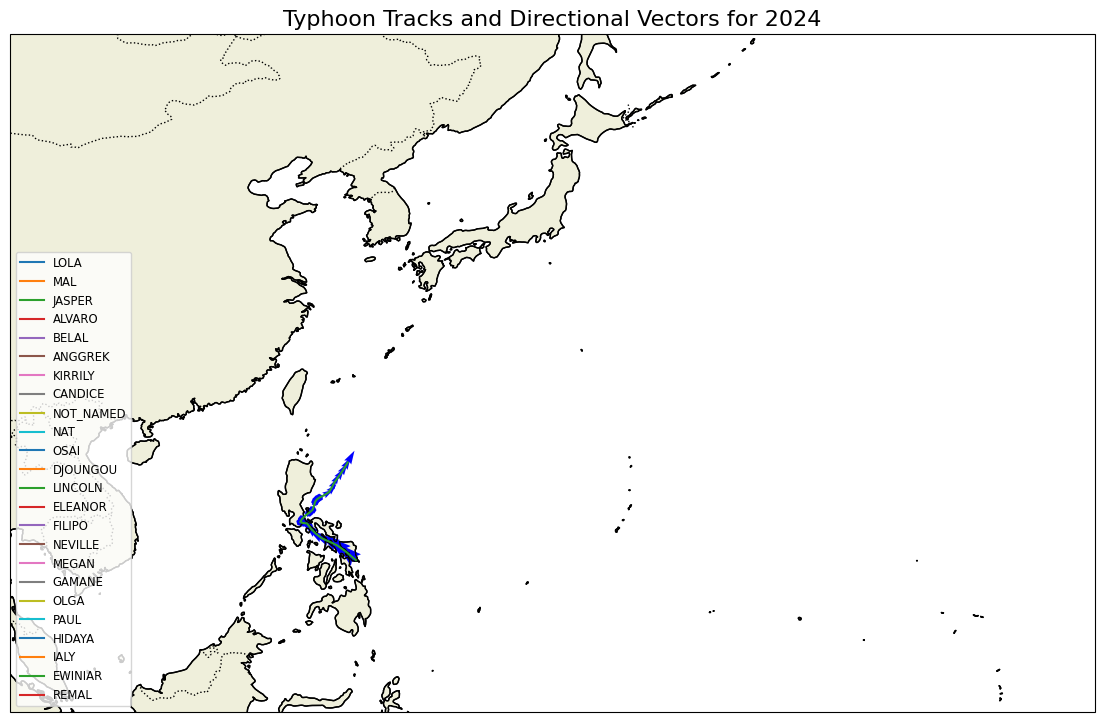

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Step 2: Ensure necessary columns are numeric
data['LAT'] = pd.to_numeric(data['LAT'], errors='coerce')
data['LON'] = pd.to_numeric(data['LON'], errors='coerce')
data['SEASON'] = pd.to_numeric(data['SEASON'], errors='coerce')
data['STORM_SPEED'] = pd.to_numeric(data['STORM_SPEED'], errors='coerce')
data['STORM_DIR'] = pd.to_numeric(data['STORM_DIR'], errors='coerce')

# Step 3: Filter dataset for the year 2024
typhoons_2024 = data[data['SEASON'] == 2024]

# Step 4: Initialize the map
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([100, 180, 0, 50], crs=ccrs.PlateCarree())  # Focus on the Western Pacific region
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Step 5: Plot typhoon tracks
for typhoon_name in typhoons_2024['NAME'].unique():
    typhoon_data = typhoons_2024[typhoons_2024['NAME'] == typhoon_name]
    ax.plot(typhoon_data['LON'], typhoon_data['LAT'], label=typhoon_name, transform=ccrs.PlateCarree())

# Step 6: Add vectors for storm speed and direction
for _, row in typhoons_2024.iterrows():
    lat, lon = row['LAT'], row['LON']
    speed, direction = row['STORM_SPEED'], row['STORM_DIR']

    if pd.notna(speed) and pd.notna(direction):
        # Scale and calculate vector endpoints
        dx = 0.1 * speed * np.sin(np.radians(direction))
        dy = 0.1 * speed * np.cos(np.radians(direction))
        ax.quiver(lon, lat, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue', transform=ccrs.PlateCarree())

# Step 7: Customize and display
ax.set_title('Typhoon Tracks and Directional Vectors for 2024', fontsize=16)
ax.legend(loc='lower left', fontsize='small')
plt.show()


In [ ]:
# Step 2: Ensure necessary columns are numeric
data['LAT'] = pd.to_numeric(data['LAT'], errors='coerce')
data['LON'] = pd.to_numeric(data['LON'], errors='coerce')
data['SEASON'] = pd.to_numeric(data['SEASON'], errors='coerce')
data['STORM_SPEED'] = pd.to_numeric(data['STORM_SPEED'], errors='coerce')
data['STORM_DIR'] = pd.to_numeric(data['STORM_DIR'], errors='coerce')

# Step 3: Filter dataset for the year 2024
typhoons_2024 = data[data['SEASON'] == 2024]

# Step 4: Create wind flow streamline
streamline_data = []

# Generate wind vectors for each typhoon
for typhoon_name in typhoons_2024['NAME'].unique():
    typhoon_data = typhoons_2024[typhoons_2024['NAME'] == typhoon_name]

    for _, row in typhoon_data.iterrows():
        lat, lon = row['LAT'], row['LON']
        speed, direction = row['STORM_SPEED'], row['STORM_DIR']

        if pd.notna(speed) and pd.notna(direction):
            # Calculate vector components
            dx = 0.1 * speed * np.cos(np.radians(direction))
            dy = 0.1 * speed * np.sin(np.radians(direction))

            streamline_data.append(go.Scattergeo(
                lon=[lon, lon + dx],
                lat=[lat, lat + dy],
                mode='lines',
                line=dict(width=1.5, color='blue'),
                hovertext=f"Typhoon: {typhoon_name}<br>Speed: {speed} knots<br>Direction: {direction}°",
                showlegend=False
            ))

# Step 5: Create the figure layout
fig = go.Figure(data=streamline_data)

fig.update_layout(
    title="Typhoon Wind Flow Streamline for 2024",
    geo=dict(
        projection_type="natural earth",
        showcoastlines=True,
        coastlinecolor="black",
        showland=True,
        landcolor="lightgreen",
        showocean=True,
        oceancolor="lightblue",
        resolution=50,
    ),
    showlegend=False
)

# Display the interactive figure
fig.show()

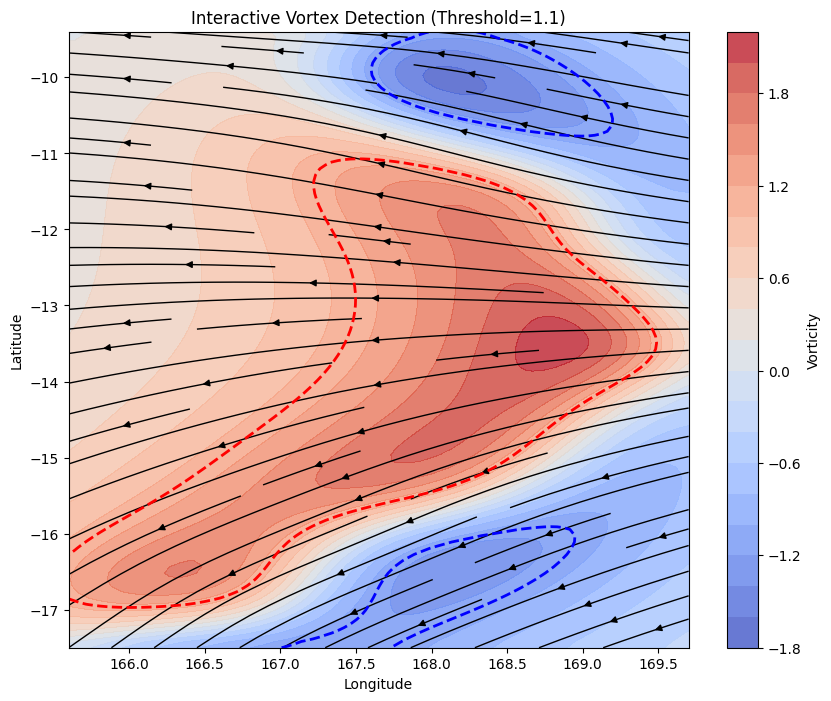

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact


# Step 2: Ensure necessary columns are numeric
data['LAT'] = pd.to_numeric(data['LAT'], errors='coerce')
data['LON'] = pd.to_numeric(data['LON'], errors='coerce')
data['SEASON'] = pd.to_numeric(data['SEASON'], errors='coerce')
data['STORM_SPEED'] = pd.to_numeric(data['STORM_SPEED'], errors='coerce')
data['STORM_DIR'] = pd.to_numeric(data['STORM_DIR'], errors='coerce')

# Step 3: Filter dataset for the year 2024
typhoons_2024 = data[data['SEASON'] == 2024]

# Step 4: Generate velocity field
def generate_velocity_field(typhoon_data):
    x = np.linspace(typhoon_data['LON'].min(), typhoon_data['LON'].max(), 100)
    y = np.linspace(typhoon_data['LAT'].min(), typhoon_data['LAT'].max(), 100)
    X, Y = np.meshgrid(x, y)

    U = np.zeros_like(X)
    V = np.zeros_like(Y)

    for _, row in typhoon_data.iterrows():
        lon, lat = row['LON'], row['LAT']
        speed, direction = row['STORM_SPEED'], row['STORM_DIR']

        if pd.notna(speed) and pd.notna(direction):
            u = speed * np.cos(np.radians(direction))
            v = speed * np.sin(np.radians(direction))
            U += u / ((X - lon)**2 + (Y - lat)**2 + 1)
            V += v / ((X - lon)**2 + (Y - lat)**2 + 1)

    vorticity = np.gradient(V, axis=0) - np.gradient(U, axis=1)
    return X, Y, U, V, vorticity

# Step 5: Plot interactive vortex detection
def plot_vortex_detection(threshold=0.1):
    plt.figure(figsize=(10, 8))

    typhoon_data = typhoons_2024[typhoons_2024['NAME'] == typhoons_2024['NAME'].iloc[0]]
    X, Y, U, V, vorticity = generate_velocity_field(typhoon_data)

    plt.streamplot(X, Y, U, V, color='black', linewidth=1, density=1)
    contour = plt.contourf(X, Y, vorticity, levels=20, cmap='coolwarm', alpha=0.8)
    plt.colorbar(contour, label='Vorticity')
    plt.contour(X, Y, vorticity, levels=[-threshold, threshold], colors=['blue', 'red'], linewidths=2, linestyles='dashed')

    plt.title(f'Interactive Vortex Detection (Threshold={threshold})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Enable interactive plotting
interact(plot_vortex_detection, threshold=(0.1, 2, 0.1));
